In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from matplotlib.patches import FancyArrowPatch

plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
def set_size(w,h):
  """Set matplot figure size"""
  plt.rcParams["figure.figsize"] = [w,h]

/tmp/ipykernel_935669/3456546948.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
slack_blue  = (54, 197, 240)
slack_green = (46, 182, 125) 
slack_red   = (210, 40, 95)
slack_yellow = (236, 178, 46)
slack_violet = (84, 25, 85)

google_blue = (66, 133, 244)
google_red   = (219, 68, 55)
google_yellow=(244, 180, 0)
google_green = (15, 157, 88)

anthracite = (31, 31, 41)

type_to_color = {
    'CNN': google_blue,
    'ViT': slack_red,
}

model_type = {
    'CNN': ["vgg", "resnet", "efficientnet", "convnext", "mobilenet",
            "inception", "densenet", "regnet", "xception", "mixnet", "dpn", "darknet","nfnet",
           "tinynet", "lcnet", "dla", "mnasnet", "coatnet", "csp"],
    'ViT': ["vit", "mobilevit", "swin", "maxvit", "volo", "deit", "cait", "xcit"]
}

classic_models = ["vit_base_patch8_224", 
                  "vgg16", 
                  "resnetv2_50", 
                  "mobilenetv3_small_050", 
                  "inception_v4", 
                  "efficientnet_b0",
                 ]

def legend_without_duplicate(**kwargs):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    plt.gca().legend(*zip(*unique), **kwargs)

In [3]:
from scipy.interpolate import make_interp_spline, BSpline

def draw_pareto(points):
    spl = make_interp_spline(points[:, 0], points[:, 1], k=2)
    x_fit = np.linspace(50, 90, 100)
    y_fit = spl(x_fit)

    plt.fill_between(x_fit, 0.0, y_fit, color="#313131", alpha=0.04, linewidth=0.0, linestyle='--')
    plt.plot(x_fit, y_fit, color="#313131", linewidth=5.0, linestyle='--', alpha = 0.1)

def draw_pareto_CNN(points):
    spl = make_interp_spline(points[:, 0], points[:, 1], k=2)
    x_fit = np.linspace(50, 90, 100)
    y_fit = spl(x_fit)

    plt.fill_between(x_fit, 0.0, y_fit, color="#0039BB", alpha=0.04, linewidth=0.0, linestyle='--')
    plt.plot(x_fit, y_fit, color="#0039BB", linewidth=5.0, linestyle='--', alpha = 0.5)

def draw_pareto_VIT(points):
    spl = make_interp_spline(points[:, 0], points[:, 1], k=2)
    x_fit = np.linspace(50, 90, 100)
    y_fit = spl(x_fit)

    plt.fill_between(x_fit, 0.0, y_fit, color="#F4B0A5", alpha=0.04, linewidth=0.0, linestyle='--')
    plt.plot(x_fit, y_fit, color="#F4B0A5", linewidth=5.0, linestyle='--', alpha = 0.5)

In [4]:
# data_path = '../results/FFGSM_distortion.csv'
data_path = '../results/FFGSM_spearman_corr.csv'
df_data = pd.read_csv(data_path, header=0, delimiter=",")
df_data.head()

,model,num_correct,avg_eps,avg_l2,avg_linf,avg_lpips,avg_spearman
0,vgg11,326,0.002847,0.938943,0.002847,0.0,0.006992
1,resnet18,471,0.002723,0.860757,0.002723,0.0,-0.002435
2,vgg11_bn,442,0.001497,0.573959,0.001497,0.0,0.003198
3,resnet26,503,0.006363,1.812532,0.006363,0.0,-0.007059
4,vgg13,373,0.002918,0.825421,0.002918,0.0,0.019630


In [5]:
acc_path = '../datasets/imagenet_acc.csv'
df_acc = pd.read_csv(acc_path, header=0)
df_acc.head()

,model,top1
0,deit3_large_patch16_384_in21ft1k,87.716
1,convnext_xlarge_in22ft1k,87.338
2,deit3_huge_patch14_224_in21ft1k,87.184
3,swin_large_patch4_window12_384,87.148
4,volo_d5_512,87.044


In [6]:
acc_dict = {}
for pair in np.array(df_acc):
    key = pair[0]
    value = pair[1]
    acc_dict[key] = value

/tmp/ipykernel_935669/3009417224.py:63: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrowPatch(


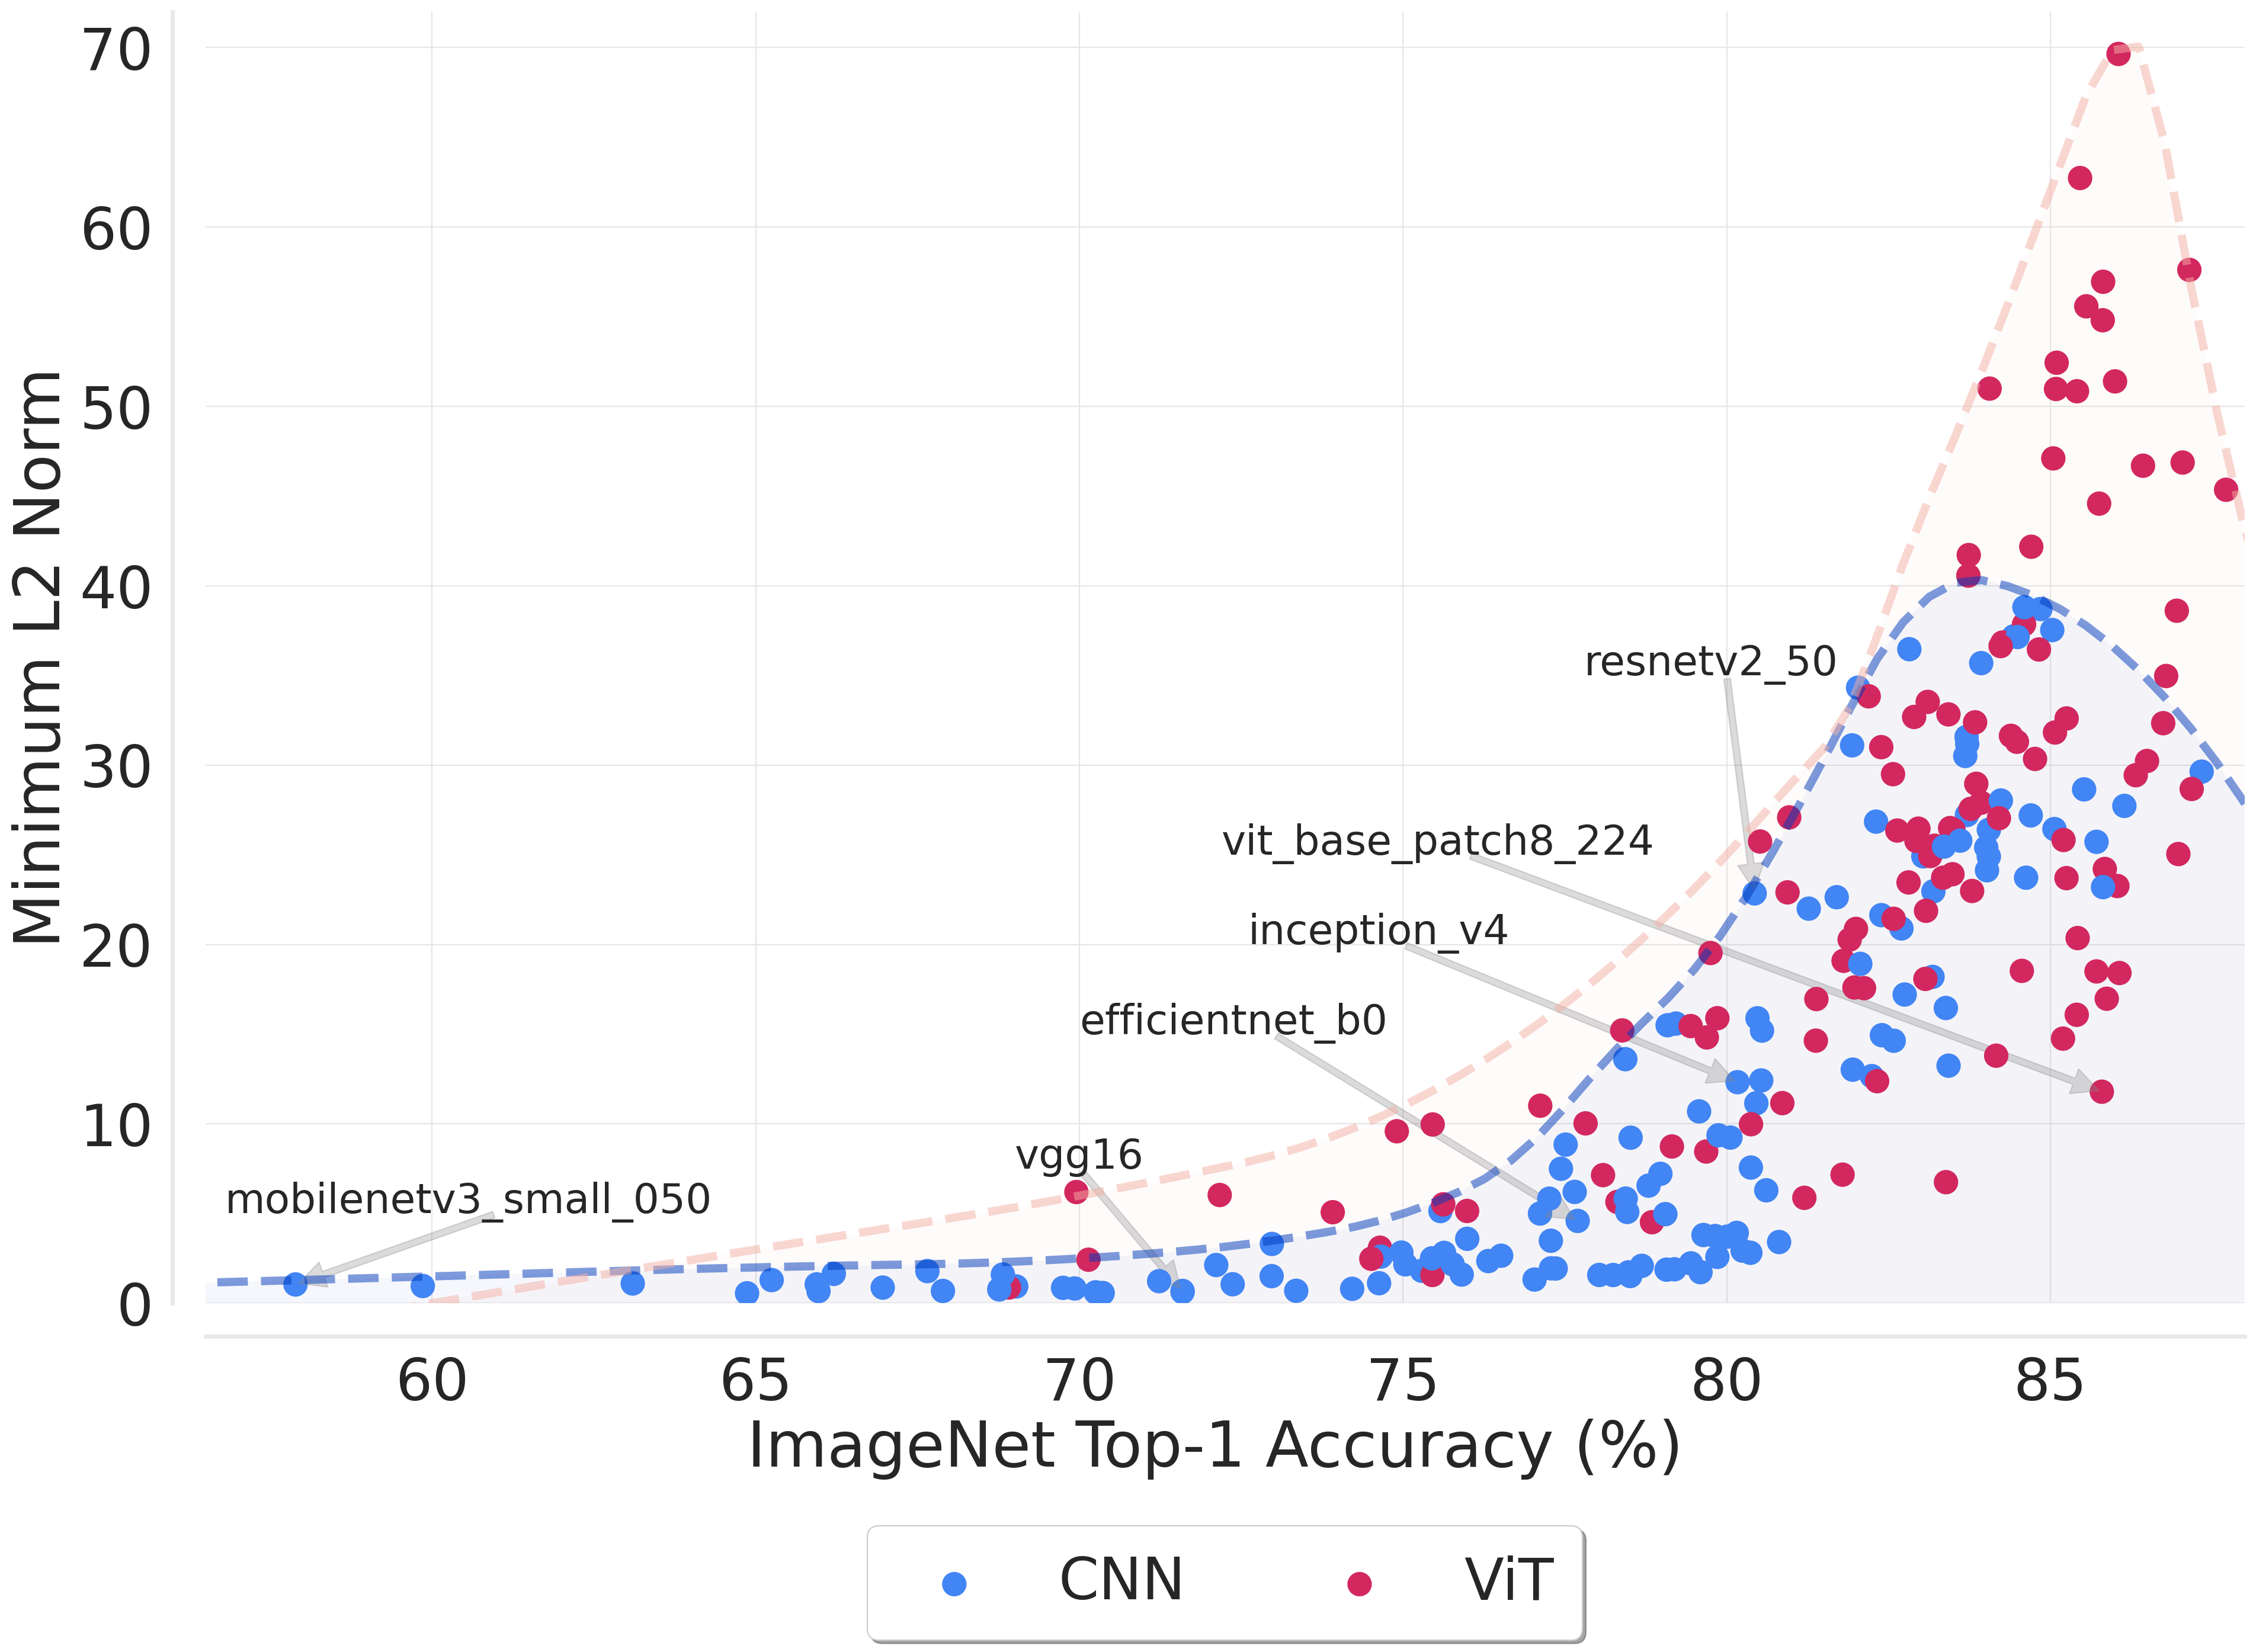

In [7]:


set_size(20, 15)
sns.set_context('paper', font_scale = 4.) 
sns.set_style('whitegrid', {"grid.color": ".9", 'axes.edgecolor':'#21201B'})

point_size = 2.2e2

# draw_pareto(
#     np.array([ (57, 1.2), (60, 1.5), (70, 6), (77, 14), (80, 24), (83.5, 40.3), (84, 52), 
#               (85, 60), (86, 70), (87.5, 31)
#              ]))

draw_pareto_CNN(
    np.array([ (57, 1.2), (60, 1.5), (65, 2), (70, 2.5), (73, 3.5), (75, 5), (77, 9), (78, 13),
              (80, 21), (81, 27), (83, 39), (85, 39), (87.5, 30.5)
             ]))

draw_pareto_VIT(
    np.array([(60, 0), (65, 3), (70, 6), (75, 11), (80,25), (81, 29), (82, 34.0),
              (82.5, 39), (84, 52.5), (85, 62), (86, 70), (86.5, 69), (87, 60), (89, 32)
             ]))

text_models = {
    "vgg16":[70, 7.5],
    "vit_base_patch8_224":[76, 25],
    "efficientnet_b0":[73, 15],
    "resnetv2_50":[80, 35],
    "inception_v4":[75, 20],
    "mobilenetv3_small_050":[61, 5],
}

for i, row in df_data.iterrows():
    
    model_name = row["model"]
    for item in model_type["ViT"]:
        if item in model_name:
            label = "ViT"
            break
    else:
        label = "CNN"

    
    # Apply color
    color = np.array(type_to_color[label]).astype(np.float32)
    color /= 255.0
    
    alpha = 1.0
    
    l2_norm = row["avg_l2"]
    acc = acc_dict[model_name]
        
    x, y = acc, l2_norm
    plt.scatter(x, y, color=color, s=point_size, label=label, alpha=alpha, edgecolors='none')
    
    if model_name in classic_models:
#         print(model_name, x, y)
        xt, yt = text_models[model_name]
        plt.text(xt - len(model_name)*0.2, yt+0.02, model_name, fontsize=25)
        
        edge_width = 4.
        arrowstyle = f"simple,head_length={edge_width*4.0},head_width={edge_width*4.0},tail_width={edge_width}"
        #arrowstyle = "->"
        eps = 0.01
        arrow = FancyArrowPatch(
            posA= (xt, yt),
            posB= (x, y),
            arrowstyle=arrowstyle, color="#888888", alpha=0.3, edgecolor='none')
        plt.gca().add_artist(arrow)
    
plt.ylabel("Minimum L2 Norm")
plt.xlabel("ImageNet Top-1 Accuracy (%) ")
plt.setp(plt.gca().spines.values(), linewidth=2.5, alpha=0.1)
sns.despine(ax=plt.gca(), offset = 20)

legend_without_duplicate(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                         fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                         facecolor='white')
plt.tight_layout()

plt.setp(plt.gca().spines.values(), linewidth=2.5)
sns.despine(ax=plt.gca(), offset = 20)

plt.xlim([56.5, 88])
plt.ylim([0.0, 72.0])
# # plt.savefig('clickme_vs_clicktionnary_spearman.png', dpi=400, bbox_inches='tight')

plt.show()
    
    


/tmp/ipykernel_935669/2504720257.py:61: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrowPatch(


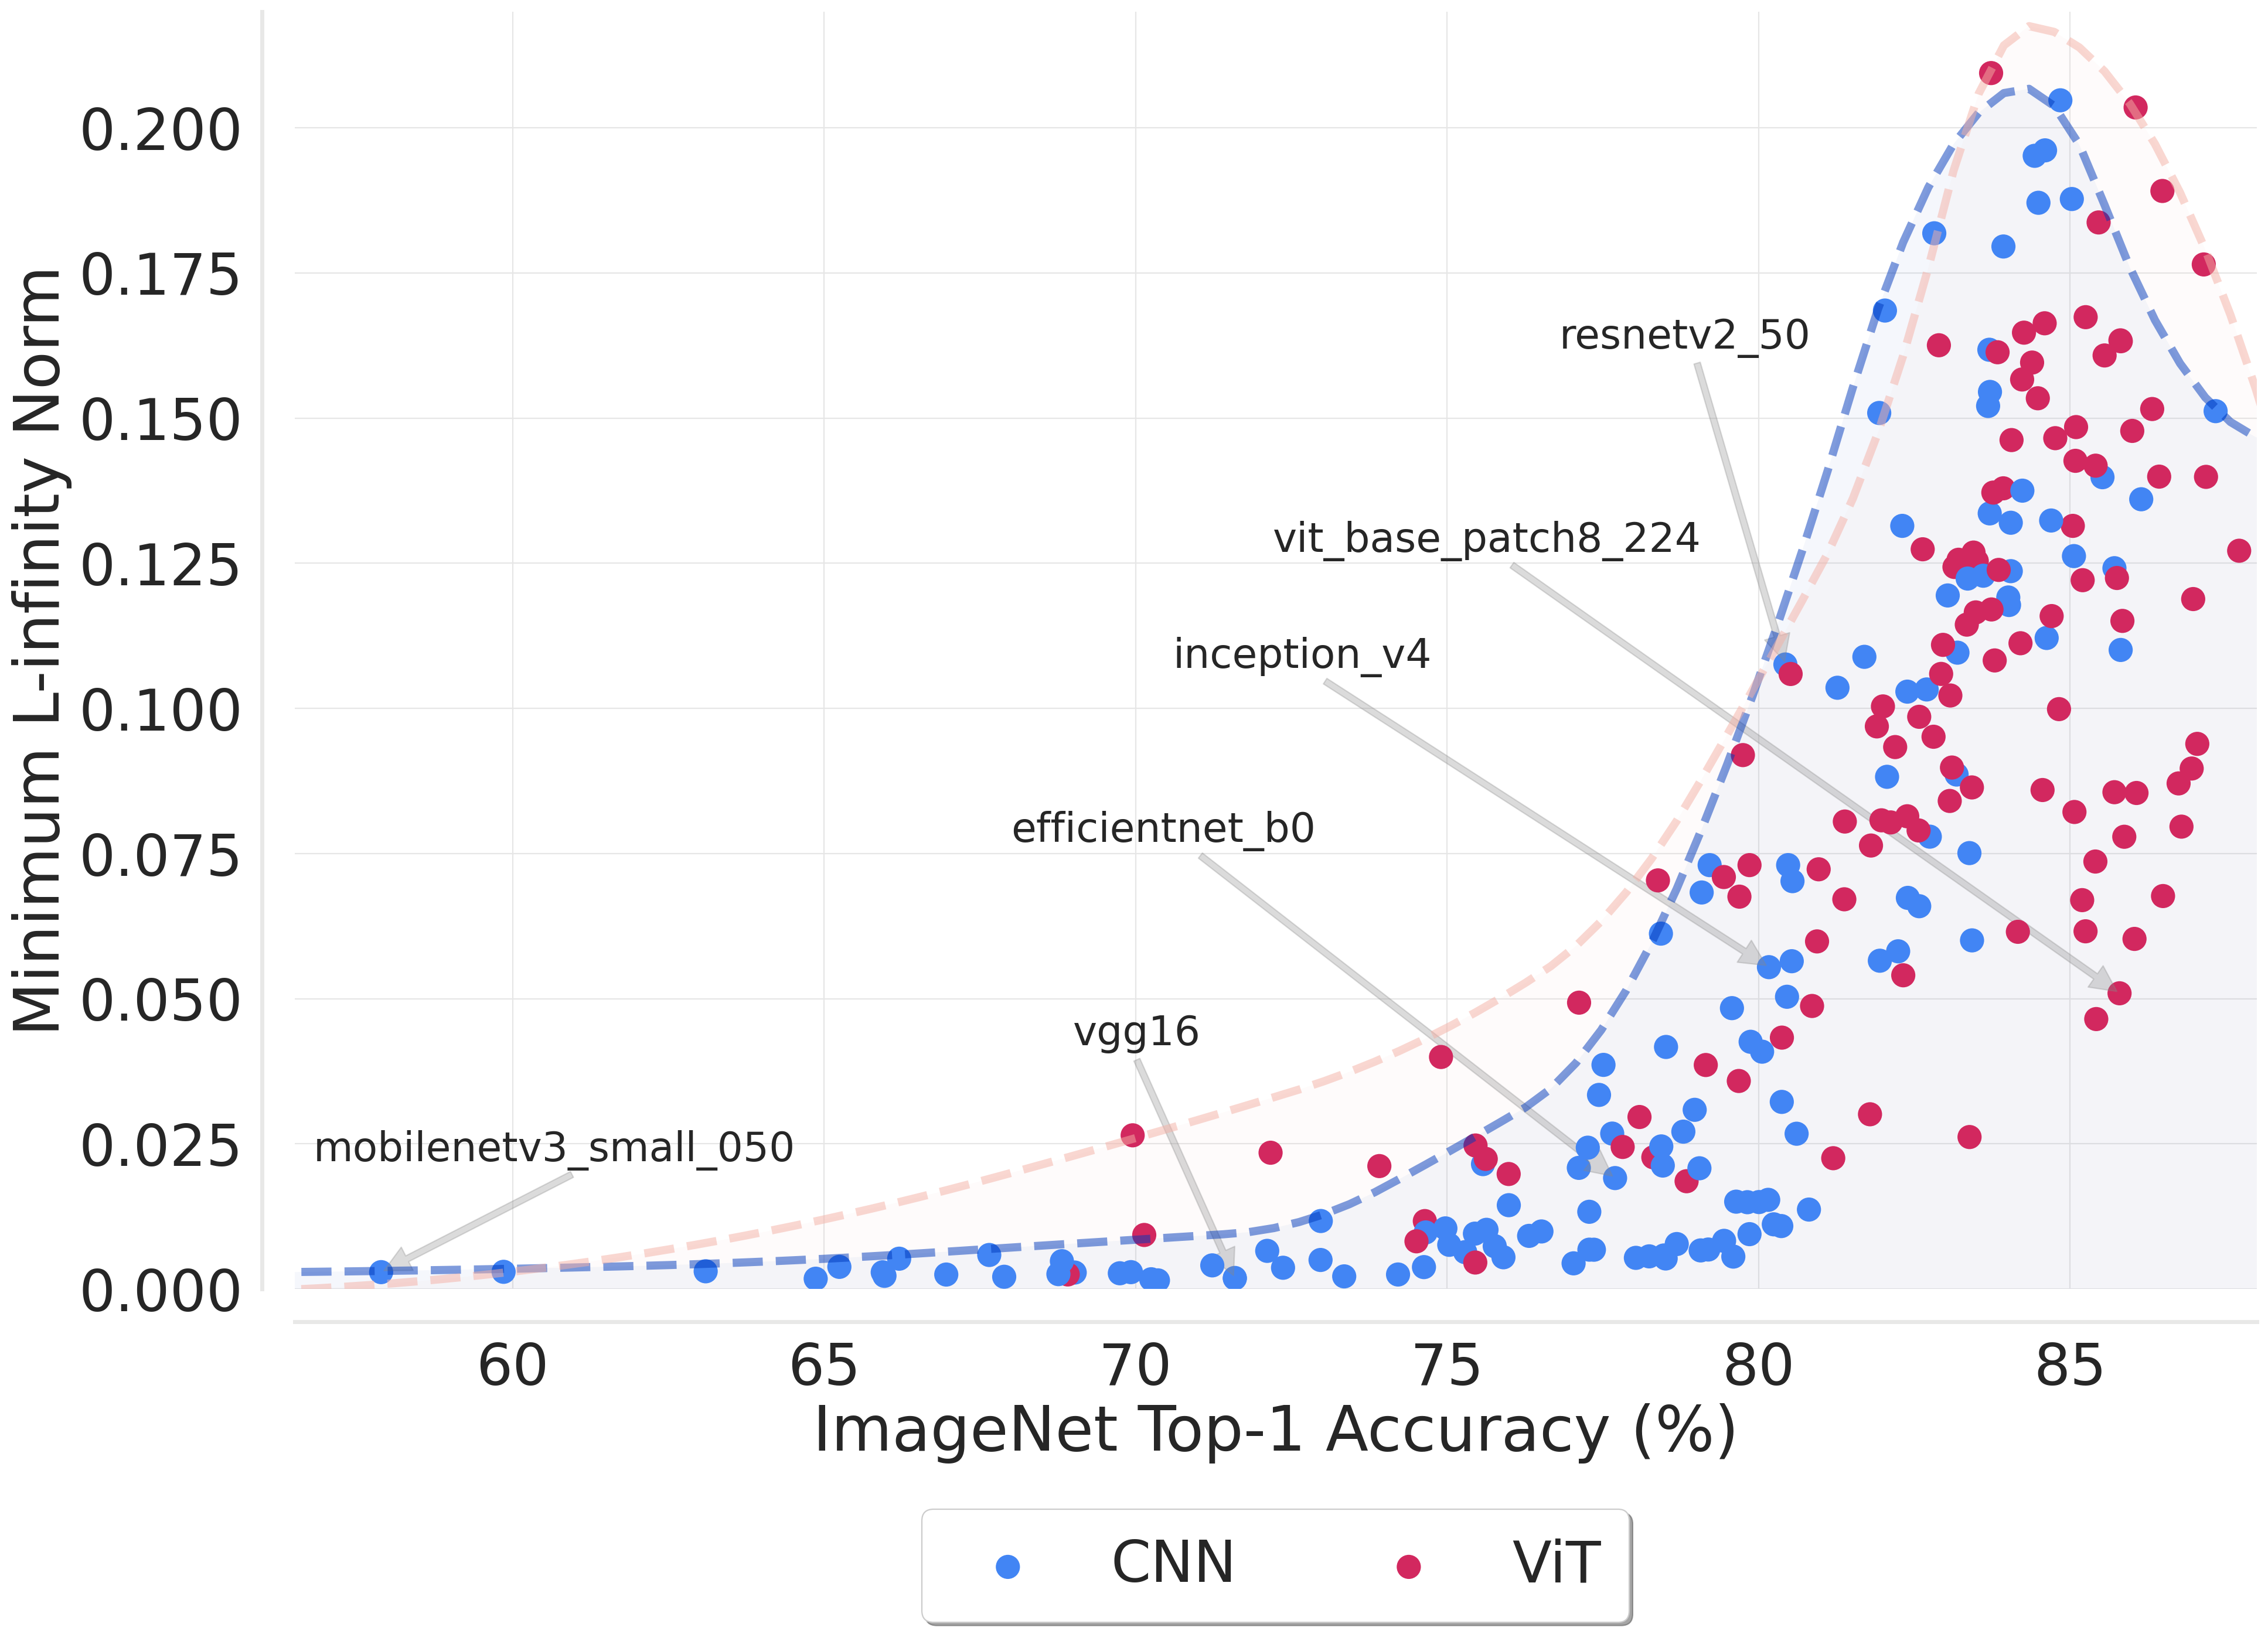

In [12]:
set_size(20, 15)
sns.set_context('paper', font_scale = 4.) 
sns.set_style('whitegrid', {"grid.color": ".9", 'axes.edgecolor':'#21201B'})

point_size = 2.2e2

# draw_pareto(
#     np.array([(57, 0.003), (60, 0.0035), (63.5, 0.0045), (70, 0.024), (75, 0.045), 
#               (78, 0.07), (80, 0.105), (83, 0.195), (84.5, 0.215), (87.5, 0.16)]))

draw_pareto_CNN(
    np.array([(57, 0.003), (60, 0.0035), (63.5, 0.0045), (70, 0.0085), (73, 0.0128), (75, 0.0235), 
              (77.5, 0.045), (80, 0.105), (83, 0.195), (85, 0.2), (86, 0.175), (87.5, 0.15),
             ]))

draw_pareto_VIT(
    np.array([(60, 0.003), (65, 0.012), (70, 0.026), (75, 0.045), 
              (78, 0.07), (80, 0.105), (82, 0.15), (84, 0.215), (85, 0.215), (87.5, 0.17)]))

text_models = {
    "vgg16":[70, 0.04],
    "vit_base_patch8_224":[76, 0.125],
    "efficientnet_b0":[71, 0.075],
    "resnetv2_50":[79, 0.16],
    "inception_v4":[73, 0.105],
    "mobilenetv3_small_050":[61, 0.02],
}

for i, row in df_data.iterrows():
    
    model_name = row["model"]
    for item in model_type["ViT"]:
        if item in model_name:
            label = "ViT"
            break
    else:
        label = "CNN"
    
    # Apply color
    color = np.array(type_to_color[label]).astype(np.float32)
    color /= 255.0
    
    alpha = 1.0
    
    linf_norm = row["avg_linf"]
    acc = acc_dict[model_name]
        
    x, y = acc, linf_norm
#     print(x)
    plt.scatter(x, y, color=color, s=point_size, label=label, alpha=alpha, edgecolors='none')
    
    if model_name in classic_models:
#         print(model_name, x, y)
        xt, yt = text_models[model_name]
        plt.text(xt - len(model_name)*0.2, yt+0.002, model_name, fontsize=25)
        
        edge_width = 4.
        arrowstyle = f"simple,head_length={edge_width*4.0},head_width={edge_width*4.0},tail_width={edge_width}"
        #arrowstyle = "->"
        eps = 0.001
        arrow = FancyArrowPatch(
            posA= (xt, yt),
            posB= (x, y),
            arrowstyle=arrowstyle, color="#888888", alpha=0.3, edgecolor='none')
        plt.gca().add_artist(arrow)
    
plt.ylabel("Minimum L-infinity Norm")
plt.xlabel("ImageNet Top-1 Accuracy (%)")
plt.setp(plt.gca().spines.values(), linewidth=2.5, alpha=0.1)
sns.despine(ax=plt.gca(), offset = 20)

legend_without_duplicate(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                         fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                         facecolor='white')
plt.tight_layout()

plt.setp(plt.gca().spines.values(), linewidth=2.5)
sns.despine(ax=plt.gca(), offset = 20)

plt.xlim([56.5, 88])
plt.ylim([0.0, 0.22])
# # plt.savefig('clickme_vs_clicktionnary_spearman.png', dpi=400, bbox_inches='tight')

plt.show()

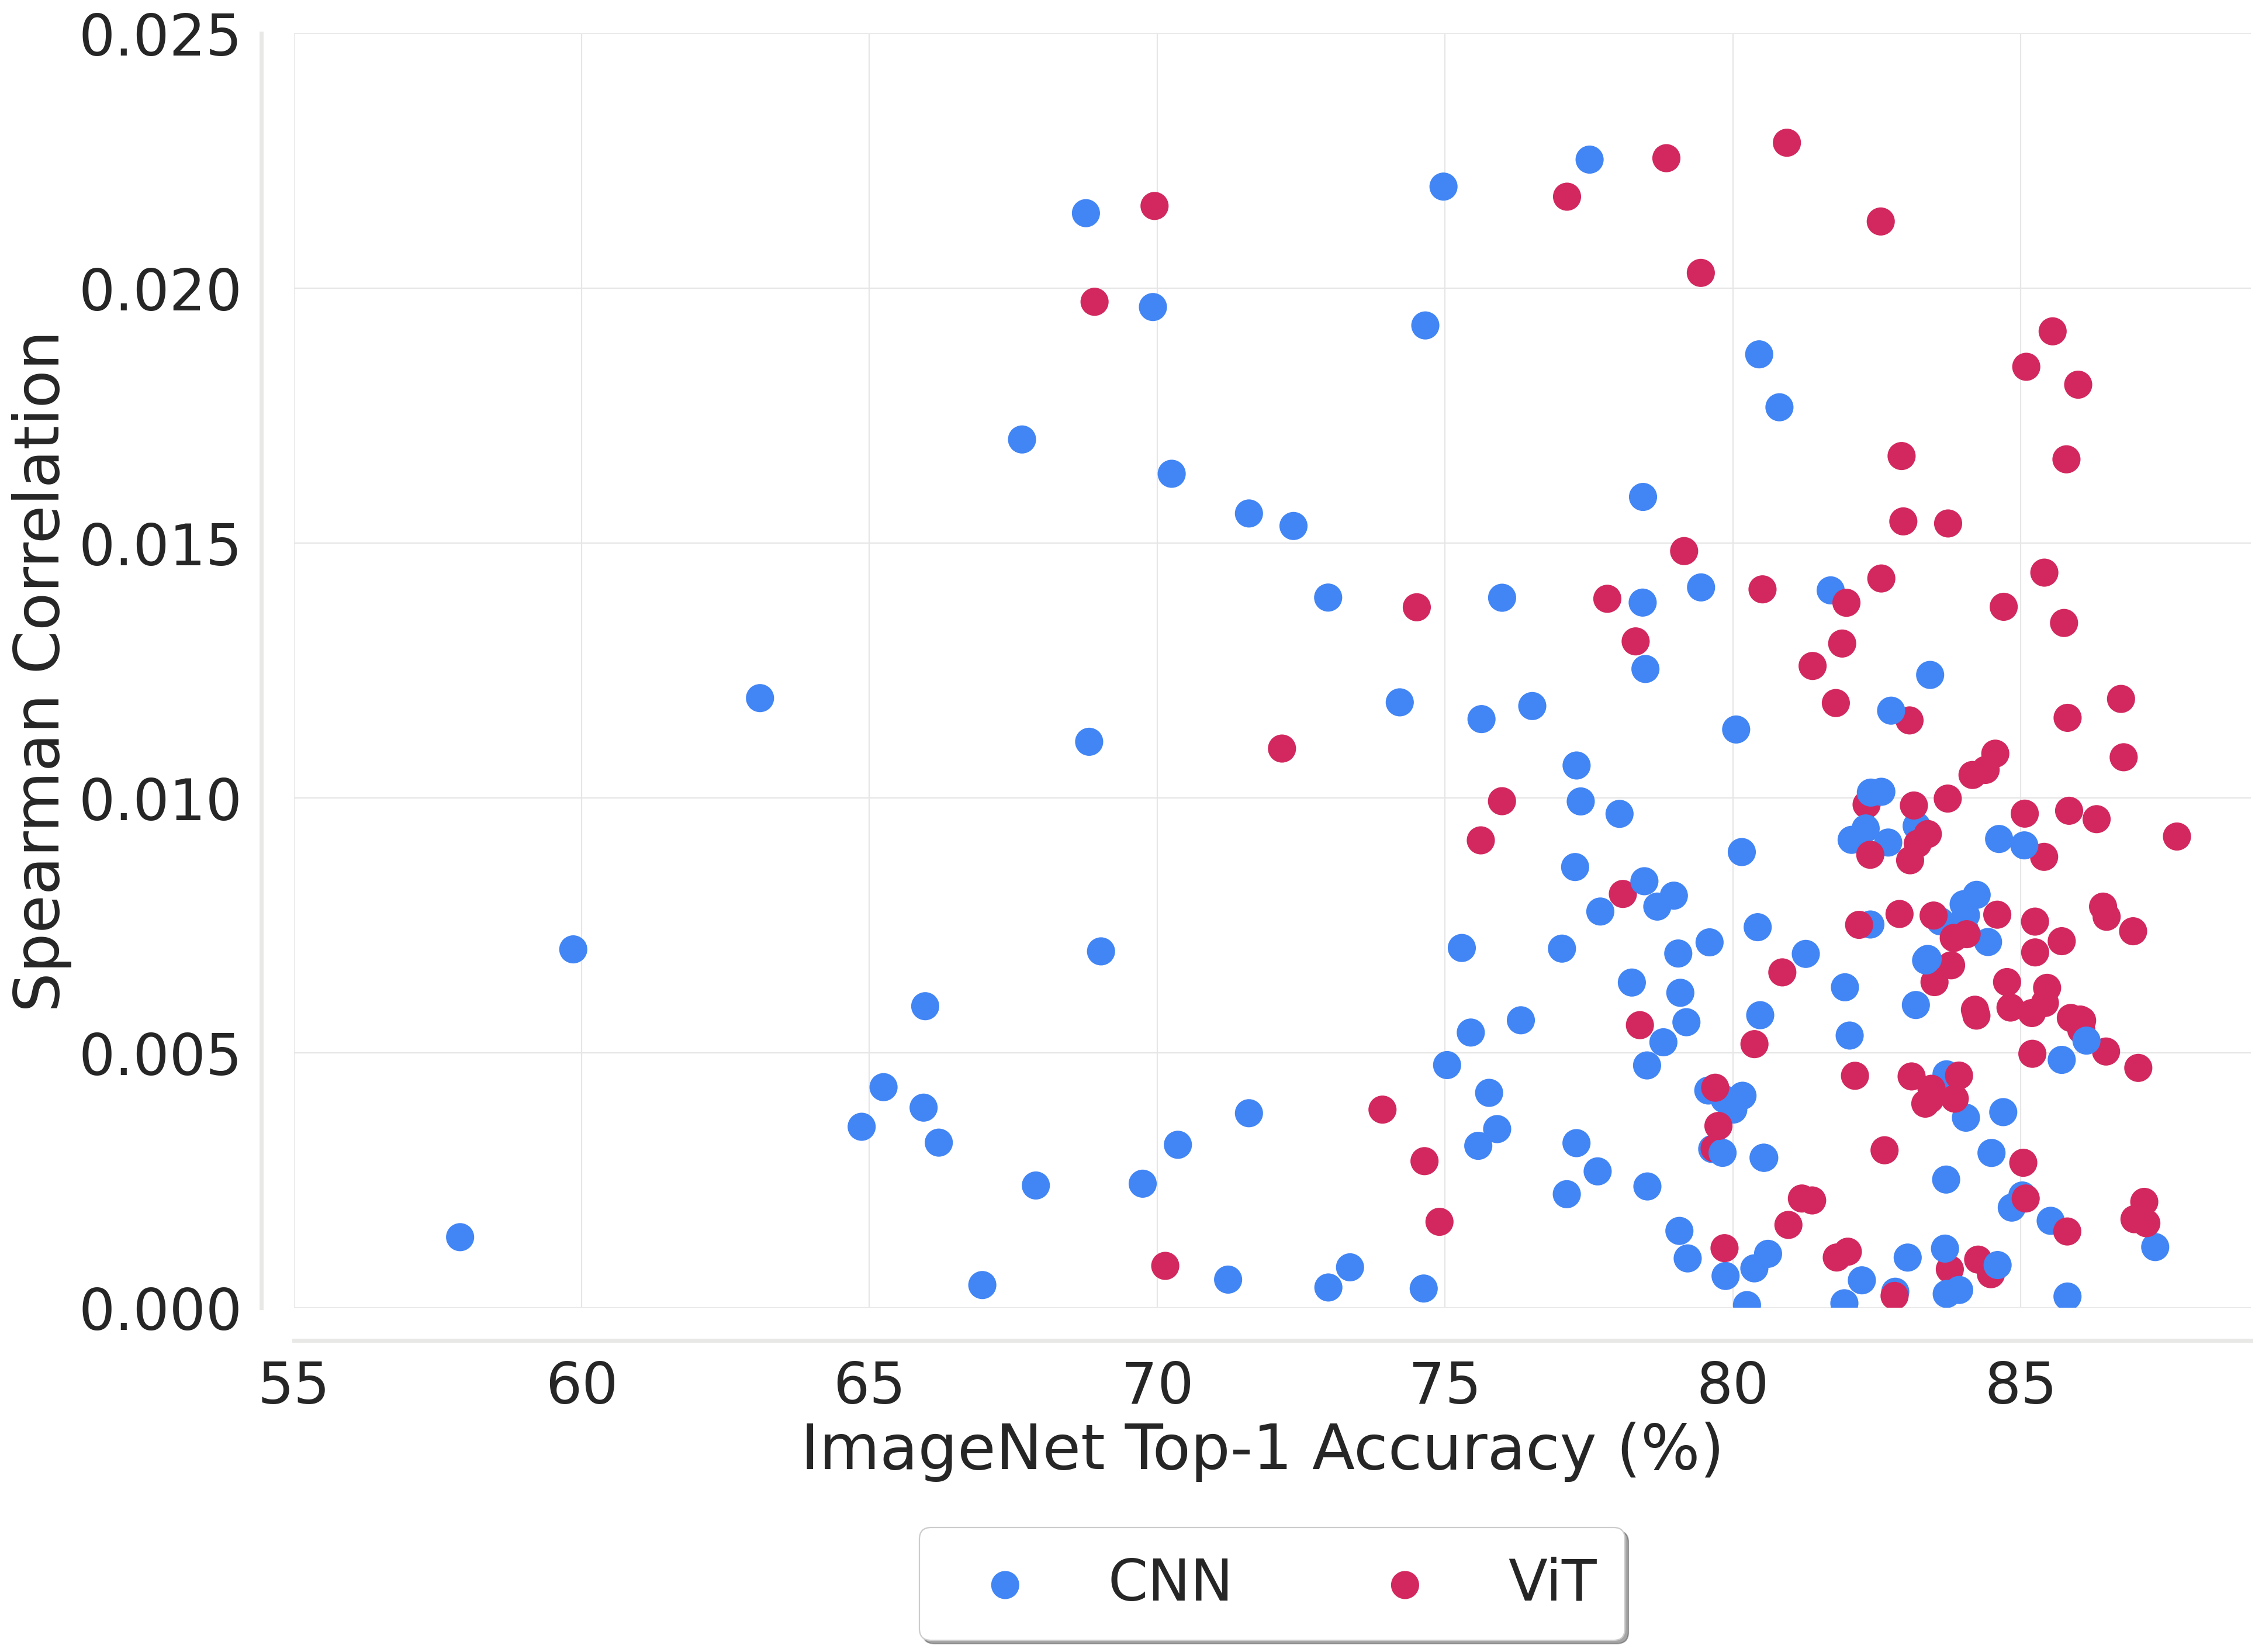

In [16]:
set_size(20, 15)
sns.set_context('paper', font_scale = 4.) 
sns.set_style('whitegrid', {"grid.color": ".9", 'axes.edgecolor':'#21201B'})

point_size = 3e2

# draw_pareto(
#     np.array([(55, 0.018), (57.5, 0.018), (63, 0.02), (65, 0.0225), (75, 0.1132), (80, 0.24), (82, 0.33)]))

# text_models = {
#     "vgg16":[65, 0.07],
#     "vit_base_patch8_224":[75, 0.2],
#     "efficientnet_b0":[67, 0.13],
#     "resnetv2_50":[78, 0.27],
#     "inception_v4":[73, 0.150],
#     "mobilenetv3_small_050":[60, 0.04],
# }

for i, row in df_data.iterrows():
    
    model_name = row["model"]
    for item in model_type["ViT"]:
        if item in model_name:
            label = "ViT"
            break
    else:
        label = "CNN"
    
    
    # Apply color
    color = np.array(type_to_color[label]).astype(np.float32)
    color /= 255.0
    
    alpha = 1.0
    
    score = row["avg_spearman"]
    acc = acc_dict[model_name]
    
    x, y = acc, abs(score)
    plt.scatter(x, y, color=color, s=point_size, label=label, alpha=alpha, edgecolors='none')
    
#     if model_name in classic_models:
#         print(model_name, x, y)
#         xt, yt = text_models[model_name]
#         plt.text(xt - len(model_name)*0.2, yt+0.002, model_name, fontsize=25)
        
#         edge_width = 4.
# #         arrowstyle = f"simple,head_length={edge_width*4.0},head_width={edge_width*4.0},tail_width={edge_width}"
#         #arrowstyle = "->"
#         eps = 0.001
#         arrow = FancyArrowPatch(
#             posA= (xt, yt),
#             posB= (x, y),
#             arrowstyle=arrowstyle, color="#888888", alpha=0.3, edgecolor='none')
#         plt.gca().add_artist(arrow)
    
    
plt.ylabel("Spearman Correlation")
plt.xlabel("ImageNet Top-1 Accuracy (%) ")
plt.setp(plt.gca().spines.values(), linewidth=2.5, alpha=0.1)
sns.despine(ax=plt.gca(), offset = 20)

legend_without_duplicate(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                         fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                         facecolor='white')
plt.tight_layout()

plt.setp(plt.gca().spines.values(), linewidth=2.5)
sns.despine(ax=plt.gca(), offset = 20)

plt.xlim([55.0, 89])
plt.ylim([0, 0.025])
# # plt.savefig('clickme_vs_clicktionnary_spearman.png', dpi=400, bbox_inches='tight')

plt.show()

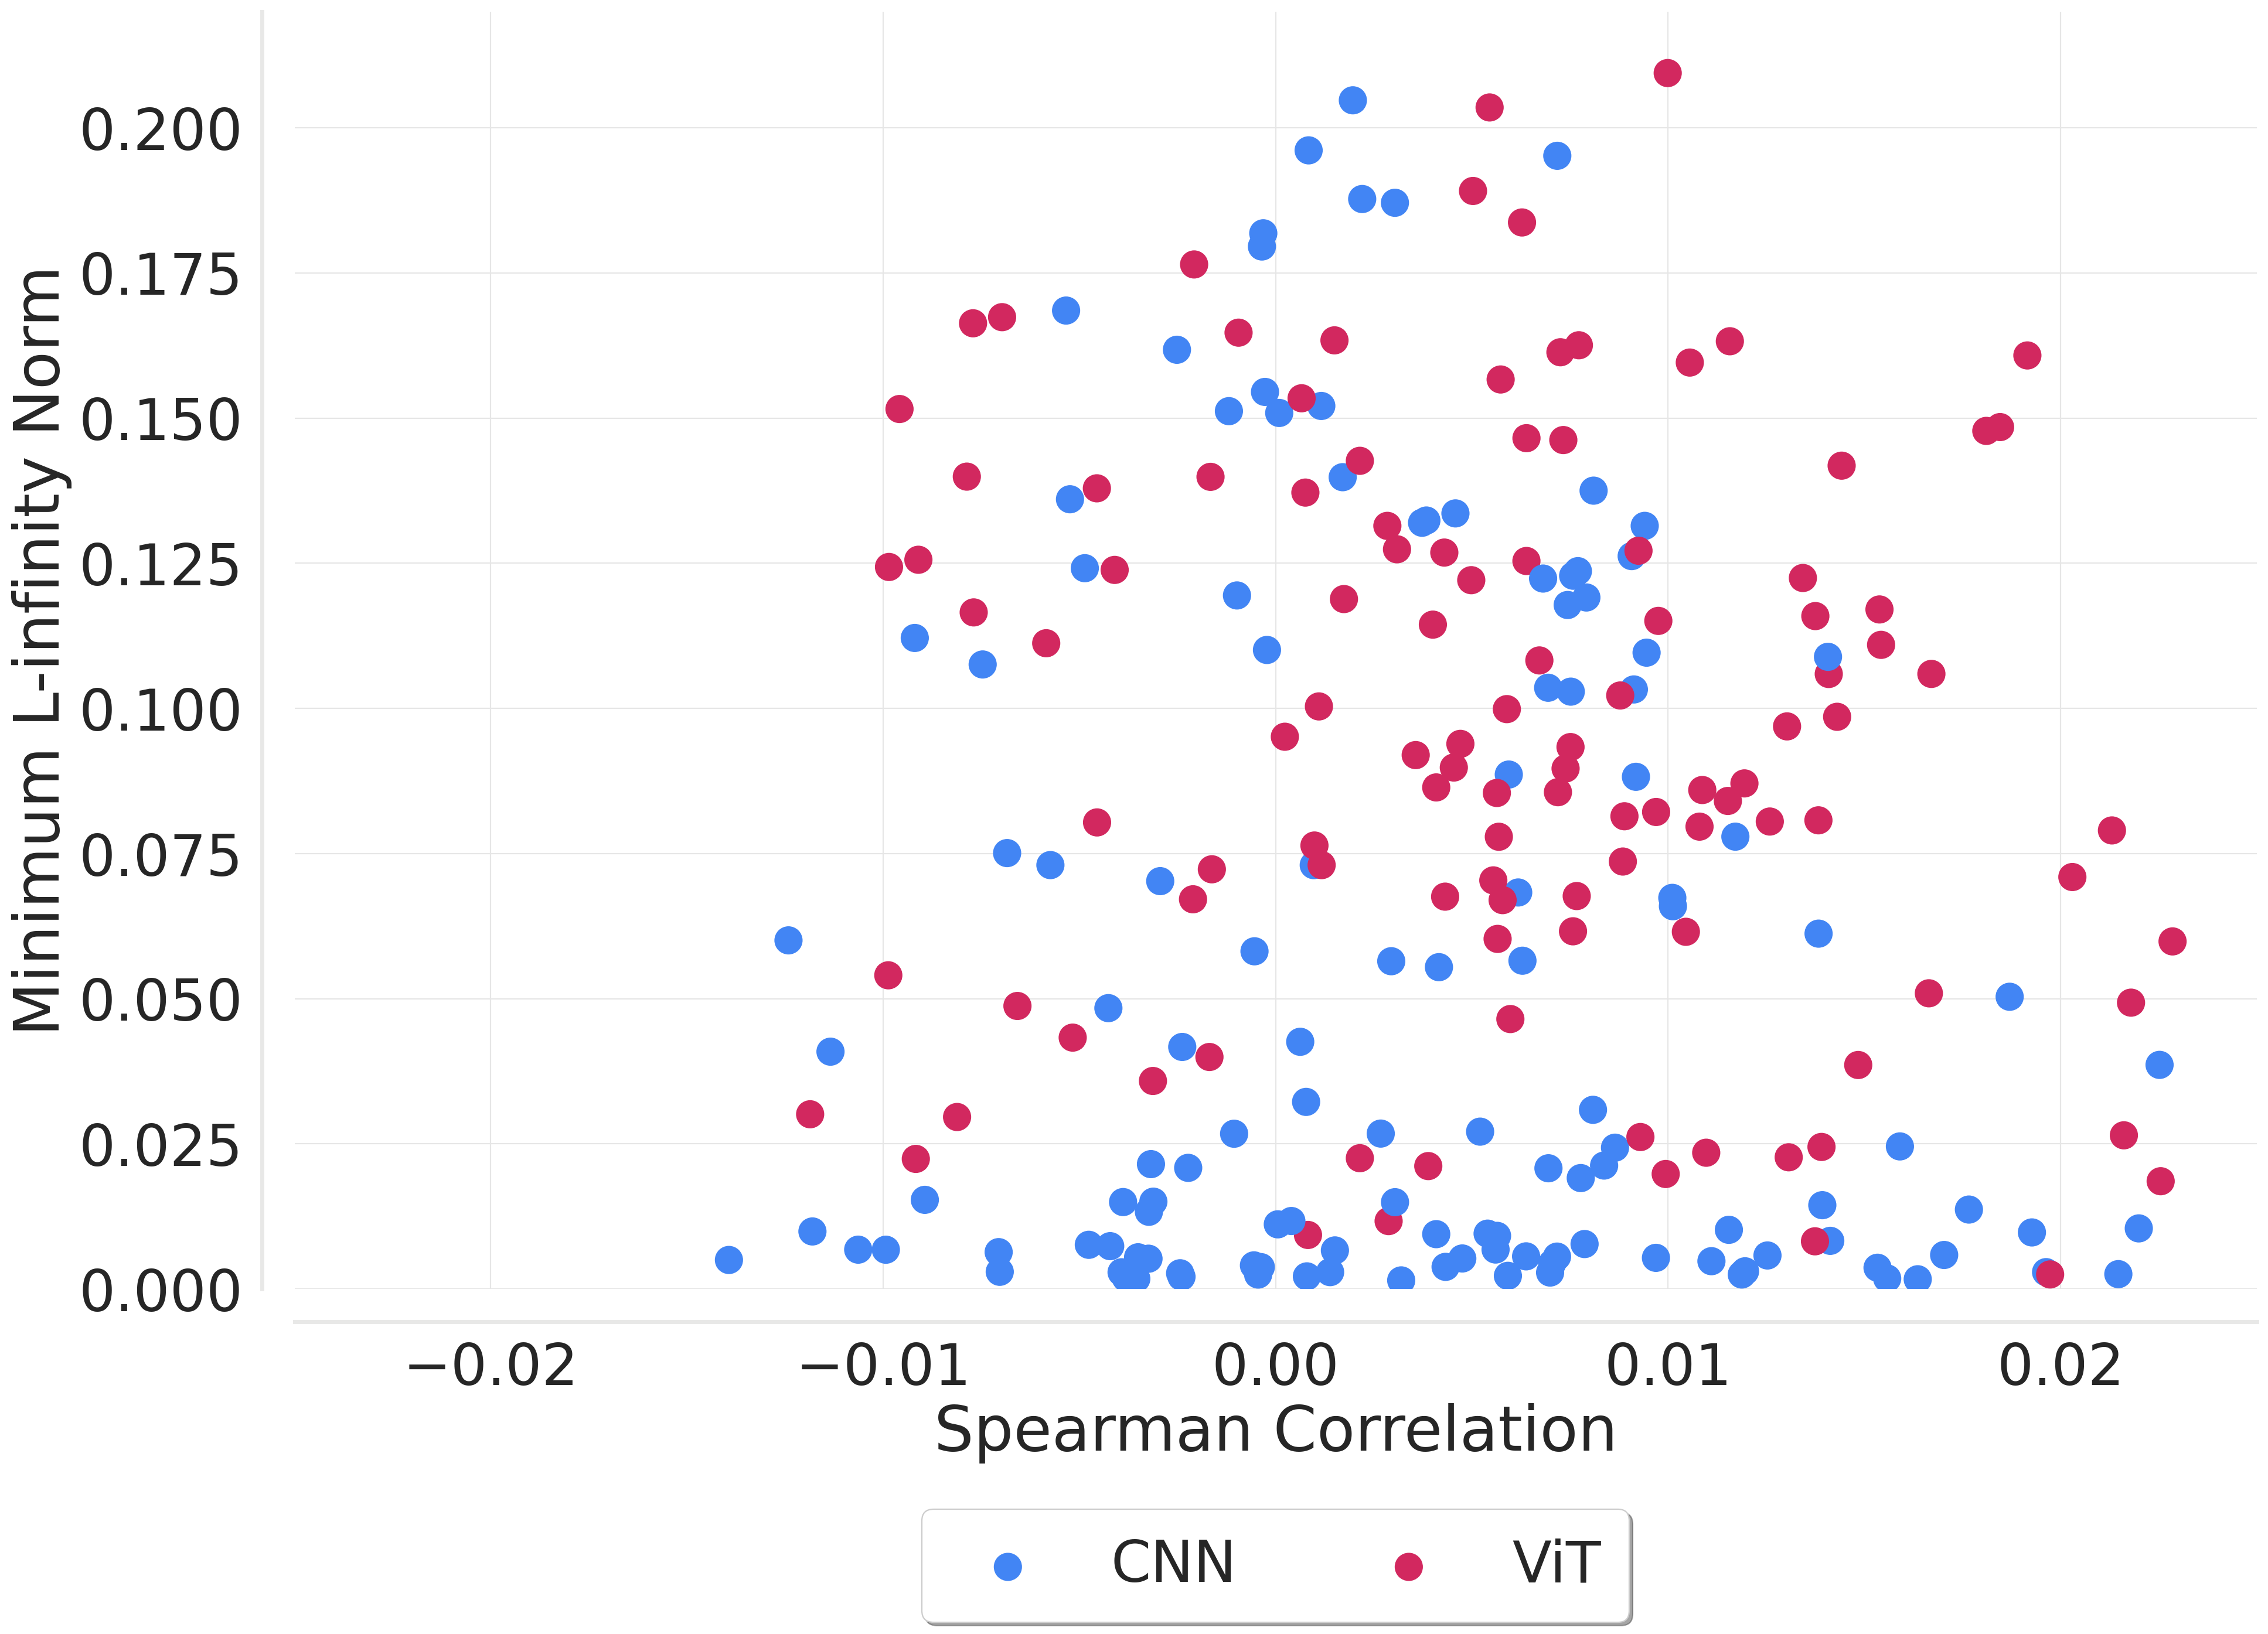

In [14]:
set_size(20, 15)
sns.set_context('paper', font_scale = 4.) 
sns.set_style('whitegrid', {"grid.color": ".9", 'axes.edgecolor':'#21201B'})

point_size = 3e2

# draw_pareto(
#     np.array([(55, 0.018), (57.5, 0.018), (63, 0.02), (65, 0.0225), (75, 0.1132), (80, 0.24), (82, 0.33)]))

# text_models = {
#     "vgg16":[65, 0.07],
#     "vit_base_patch8_224":[75, 0.2],
#     "efficientnet_b0":[67, 0.13],
#     "resnetv2_50":[78, 0.27],
#     "inception_v4":[73, 0.150],
#     "mobilenetv3_small_050":[60, 0.04],
# }

for i, row in df_data.iterrows():
    
    model_name = row["model"]
    for item in model_type["ViT"]:
        if item in model_name:
            label = "ViT"
            break
    else:
        label = "CNN"
    
    # Apply color
    color = np.array(type_to_color[label]).astype(np.float32)
    color /= 255.0
    
    alpha = 1.0
    
    score = row["avg_spearman"]
    norm = row["avg_linf"]
    
    x, y = score, norm
    plt.scatter(x, y, color=color, s=point_size, label=label, alpha=alpha, edgecolors='none')
    
#     if model_name in classic_models:
#         print(model_name, x, y)
#         xt, yt = text_models[model_name]
#         plt.text(xt - len(model_name)*0.2, yt+0.002, model_name, fontsize=25)
        
#         edge_width = 4.
# #         arrowstyle = f"simple,head_length={edge_width*4.0},head_width={edge_width*4.0},tail_width={edge_width}"
#         #arrowstyle = "->"
#         eps = 0.001
#         arrow = FancyArrowPatch(
#             posA= (xt, yt),
#             posB= (x, y),
#             arrowstyle=arrowstyle, color="#888888", alpha=0.3, edgecolor='none')
#         plt.gca().add_artist(arrow)
    
    
plt.ylabel("Minimum L-infinity Norm")
plt.xlabel("Spearman Correlation")
plt.setp(plt.gca().spines.values(), linewidth=2.5, alpha=0.1)
sns.despine(ax=plt.gca(), offset = 20)

legend_without_duplicate(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                         fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                         facecolor='white')
plt.tight_layout()

plt.setp(plt.gca().spines.values(), linewidth=2.5)
sns.despine(ax=plt.gca(), offset = 20)

plt.xlim([-0.025, 0.025])
plt.ylim([0, 0.22])
# # plt.savefig('clickme_vs_clicktionnary_spearman.png', dpi=400, bbox_inches='tight')

plt.show()

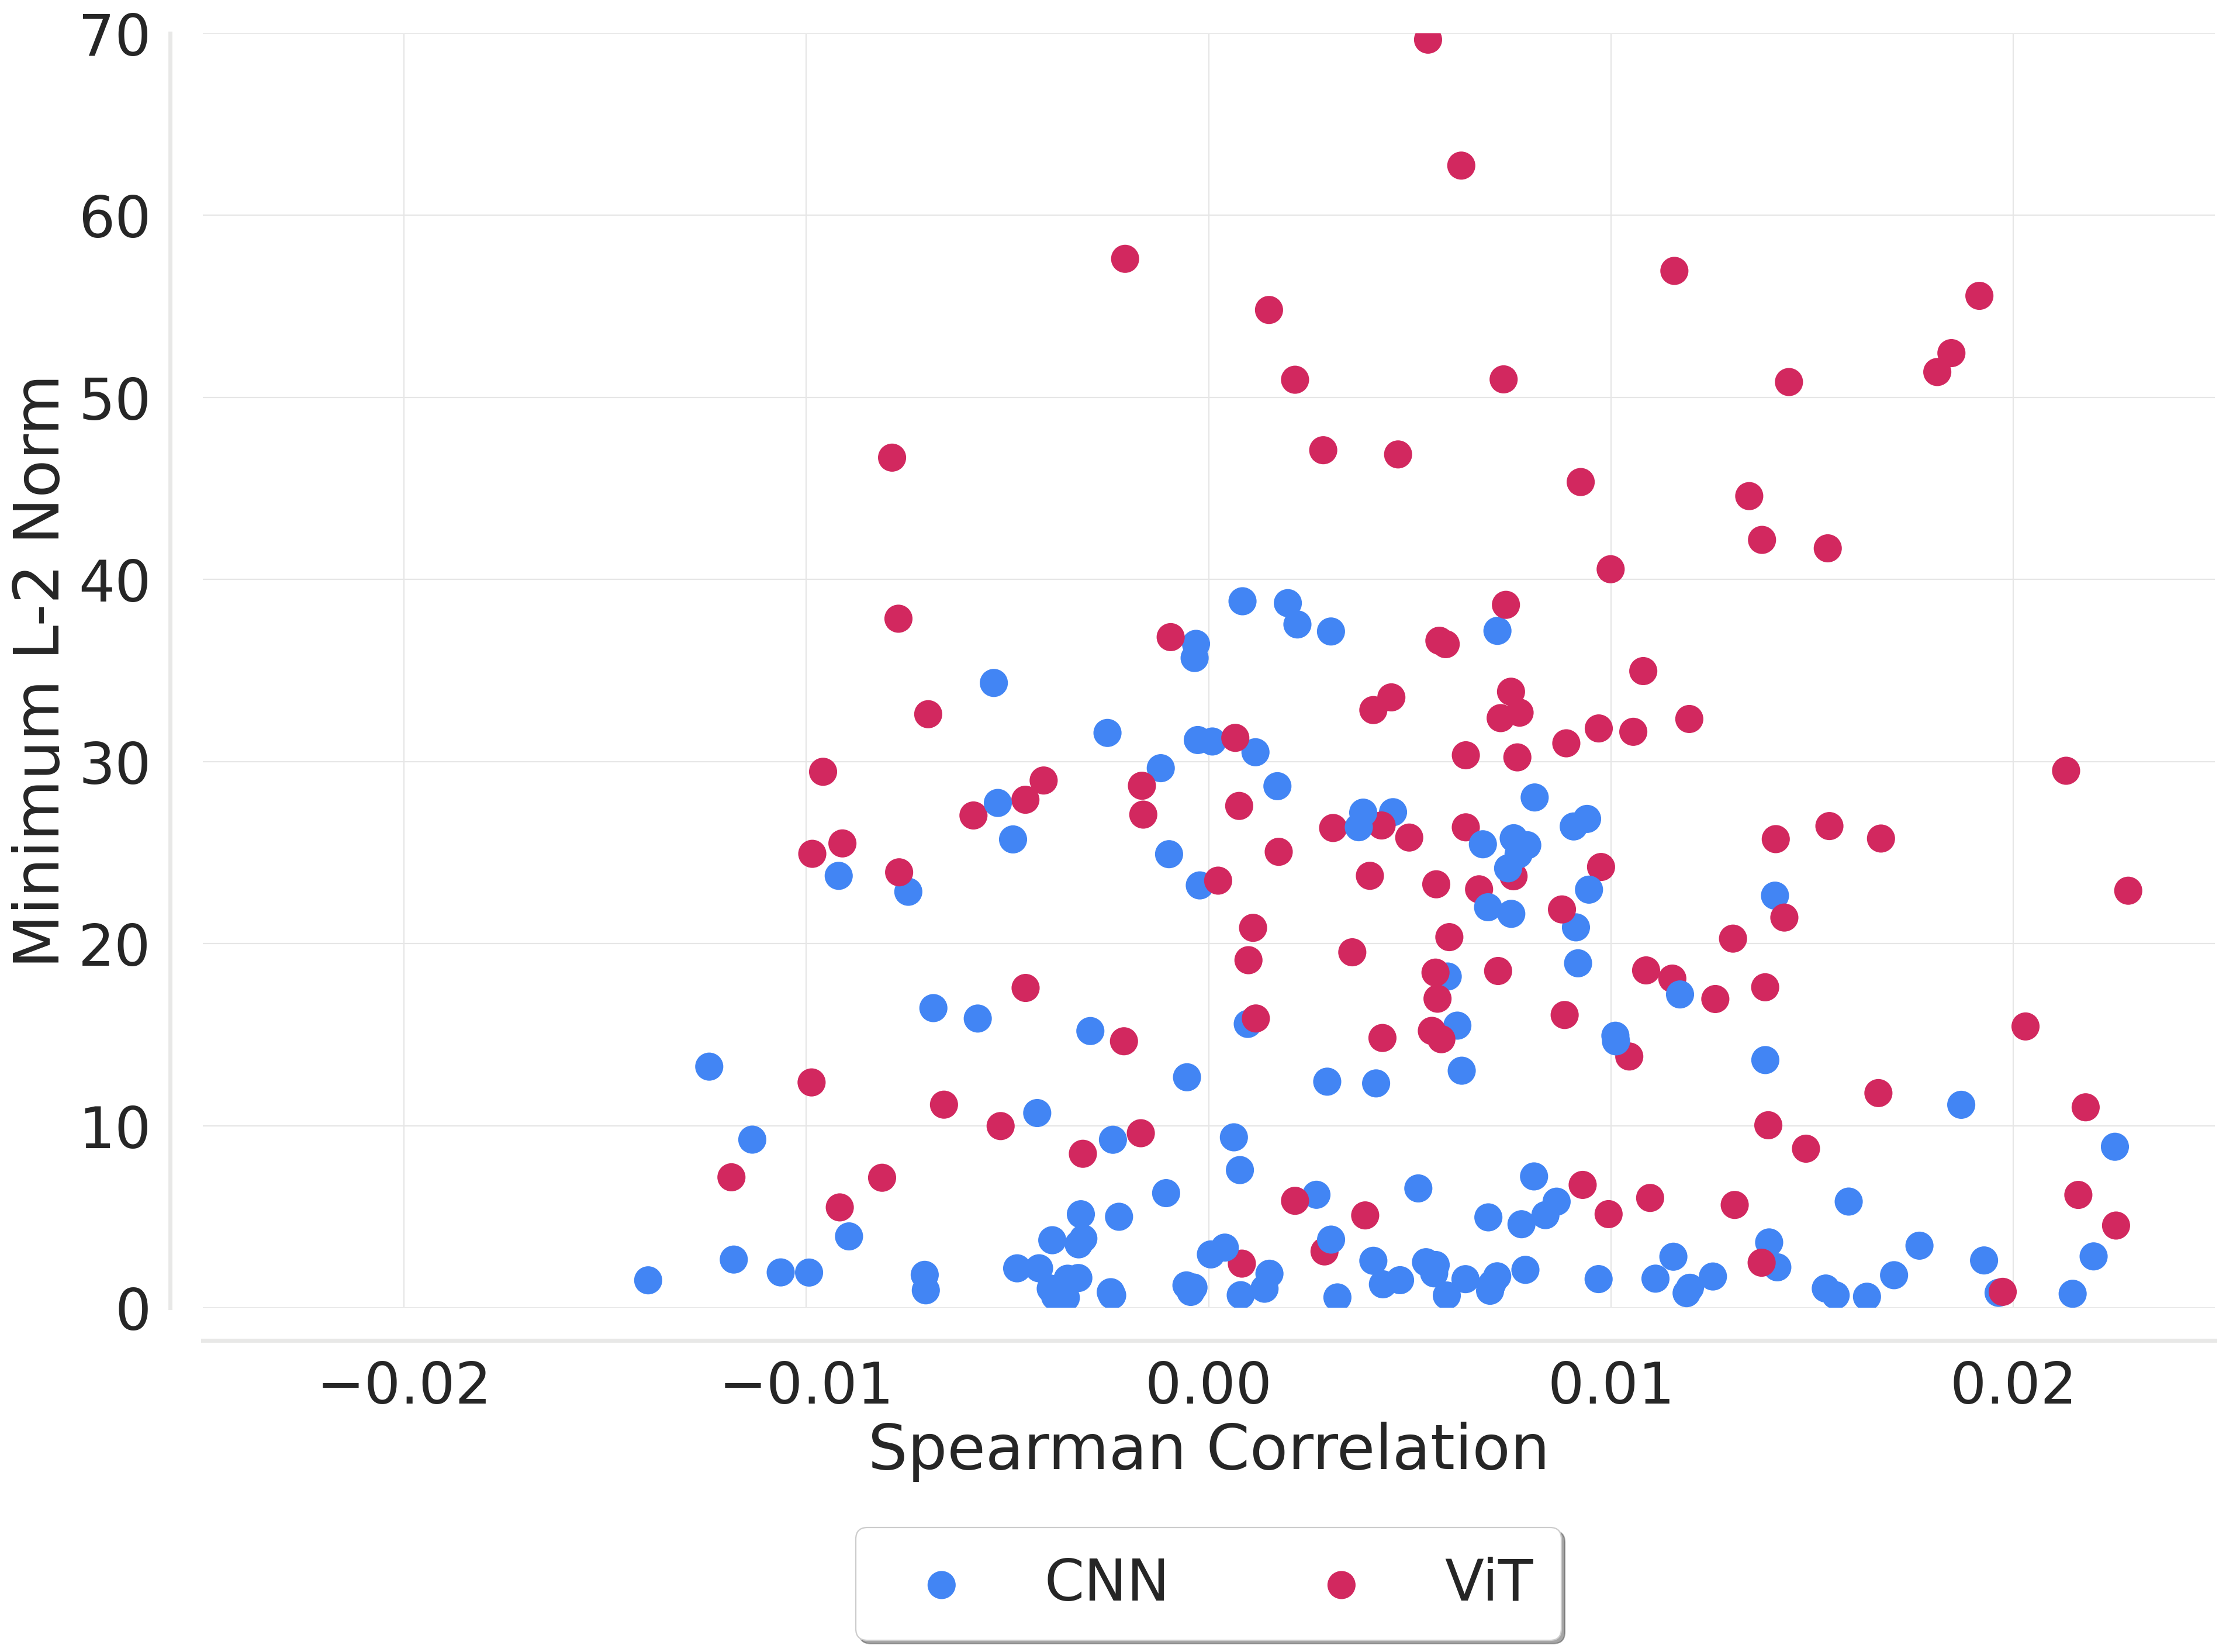

In [11]:
set_size(20, 15)
sns.set_context('paper', font_scale = 4.) 
sns.set_style('whitegrid', {"grid.color": ".9", 'axes.edgecolor':'#21201B'})

point_size = 3e2

# draw_pareto(
#     np.array([(55, 0.018), (57.5, 0.018), (63, 0.02), (65, 0.0225), (75, 0.1132), (80, 0.24), (82, 0.33)]))

# text_models = {
#     "vgg16":[65, 0.07],
#     "vit_base_patch8_224":[75, 0.2],
#     "efficientnet_b0":[67, 0.13],
#     "resnetv2_50":[78, 0.27],
#     "inception_v4":[73, 0.150],
#     "mobilenetv3_small_050":[60, 0.04],
# }

for i, row in df_data.iterrows():
    
    model_name = row["model"]
    for item in model_type["ViT"]:
        if item in model_name:
            label = "ViT"
            break
    else:
        label = "CNN"
    
    # Apply color
    color = np.array(type_to_color[label]).astype(np.float32)
    color /= 255.0
    
    alpha = 1.0
    
    score = row["avg_spearman"]
    norm = row["avg_l2"]
    
    x, y = score, norm
    plt.scatter(x, y, color=color, s=point_size, label=label, alpha=alpha, edgecolors='none')
    
#     if model_name in classic_models:
#         print(model_name, x, y)
#         xt, yt = text_models[model_name]
#         plt.text(xt - len(model_name)*0.2, yt+0.002, model_name, fontsize=25)
        
#         edge_width = 4.
# #         arrowstyle = f"simple,head_length={edge_width*4.0},head_width={edge_width*4.0},tail_width={edge_width}"
#         #arrowstyle = "->"
#         eps = 0.001
#         arrow = FancyArrowPatch(
#             posA= (xt, yt),
#             posB= (x, y),
#             arrowstyle=arrowstyle, color="#888888", alpha=0.3, edgecolor='none')
#         plt.gca().add_artist(arrow)
    
    
plt.ylabel("Minimum L-2 Norm")
plt.xlabel("Spearman Correlation")
plt.setp(plt.gca().spines.values(), linewidth=2.5, alpha=0.1)
sns.despine(ax=plt.gca(), offset = 20)

legend_without_duplicate(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                         fancybox=True, shadow=True, borderpad=0.5, ncol=3, frameon=True,
                         facecolor='white')
plt.tight_layout()

plt.setp(plt.gca().spines.values(), linewidth=2.5)
sns.despine(ax=plt.gca(), offset = 20)

plt.xlim([-0.025, 0.025])
plt.ylim([0, 70])
# # plt.savefig('clickme_vs_clicktionnary_spearman.png', dpi=400, bbox_inches='tight')

plt.show()